# WORKFLOW FOR DIGITIZING LOGS

There's been some discussion of digitizing paper logs at the City of Cleveland.

I believe that creating a digital interface discriminates against people based on their education level and cognitive capacity.

In addition, an all digital workflow is subject to power outages. 

The division of street maintenance provides an essential service, it would be deeply unfortunate to have an all digital work flow go dark in a civic emergency with the power out. 

In my humble opinion there is a better way.

Use an opencv implementation in python to digitize written records.

I have modified our paper logs into a 8 x 11 format that would be able to be fed into a standard issue scanner.

Standard logs could be used if we have the capacity to scan them at scale. 

If you are not a python fanatic like I am feel free to ignore the code below.

The important point is we create a user-friendly workflow that respects the city's mission to employ a diverse workforce, and we implement a workflow that is so robust even an electric outage can't shut up down. 

![cantstop](data/img/cantstop.jpg)


# Be advised

This is first iteration example code, the finished product would be much more robust and would allow DOS employes an opportunity to participate in the development of new open source software.

Awesome sauce. 

In [1]:
import numpy as np
import cv2
from imutils.perspective import four_point_transform
from matplotlib import pyplot as plt

from matplotlib import cm

from helper import show_images

In [2]:
plt.rcParams['figure.figsize'] = [12, 12]

In [3]:
height = 800
width = 600

image_file = "data/formatted/log_test_1.jpg"

image = cv2.imread(image_file)
image = cv2.resize(image, (width, height))
image1 = image.copy()
image2 = image.copy()
image3 = image.copy()
image4 = image.copy()

In [4]:
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY) # convert the image to gray scale
blur = cv2.GaussianBlur(image, (5, 5), 0) # Add Gaussian blur
edged = cv2.Canny(image, 75, 200) # Apply the Canny algorithm to find the edges

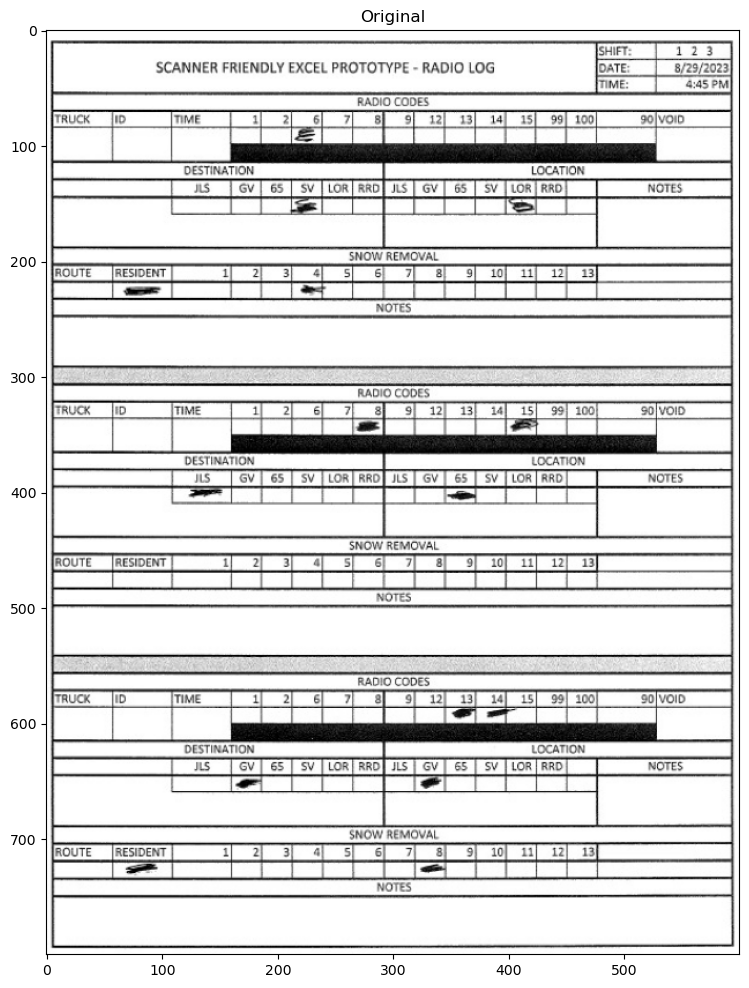

In [5]:
plt.imshow(image)
plt.title('Original')
plt.show()

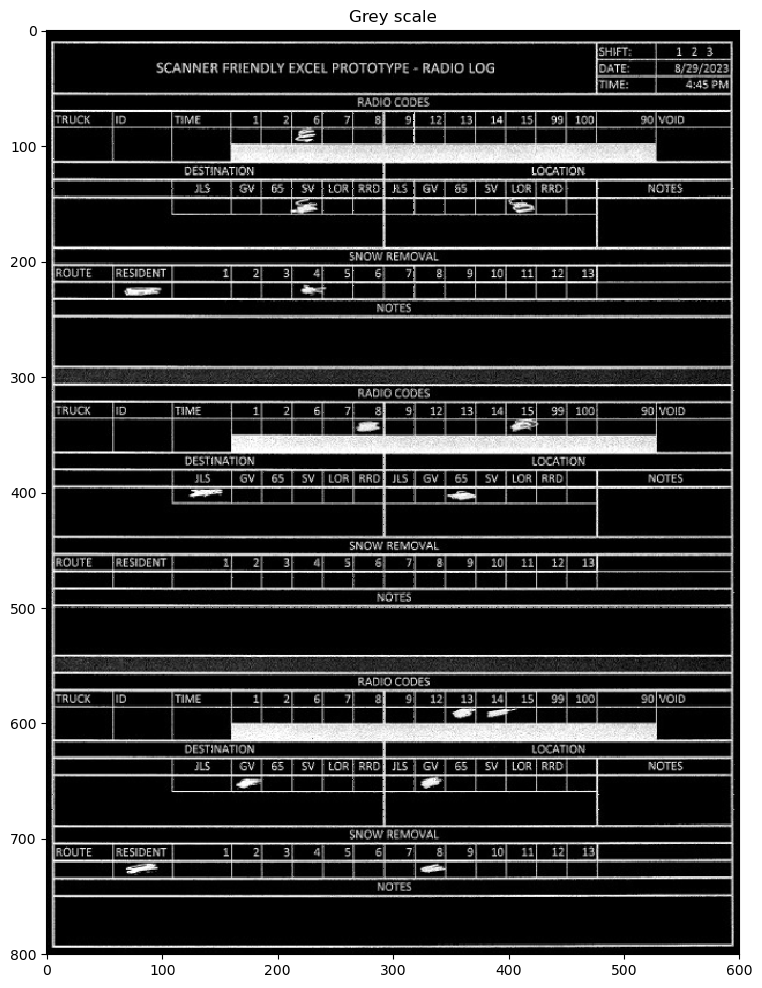

In [6]:
plt.imshow(gray)
plt.pcolor(gray, cmap = cm.binary)
plt.title('Grey scale')
plt.show()

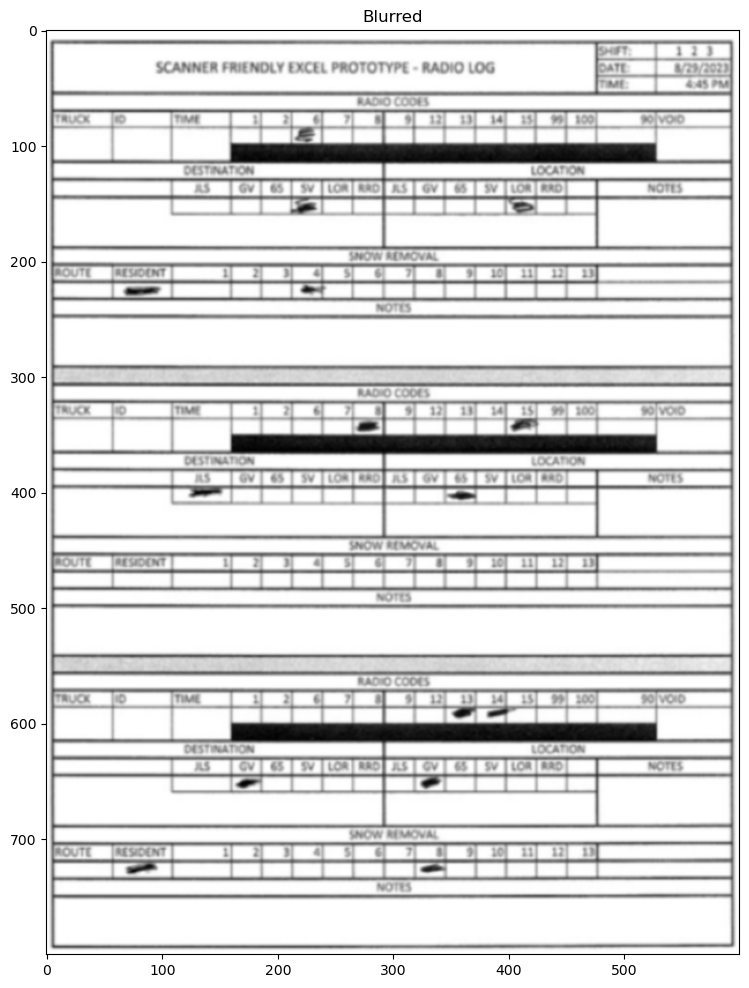

In [7]:
plt.imshow(blur)
plt.title('Blurred')
plt.show()

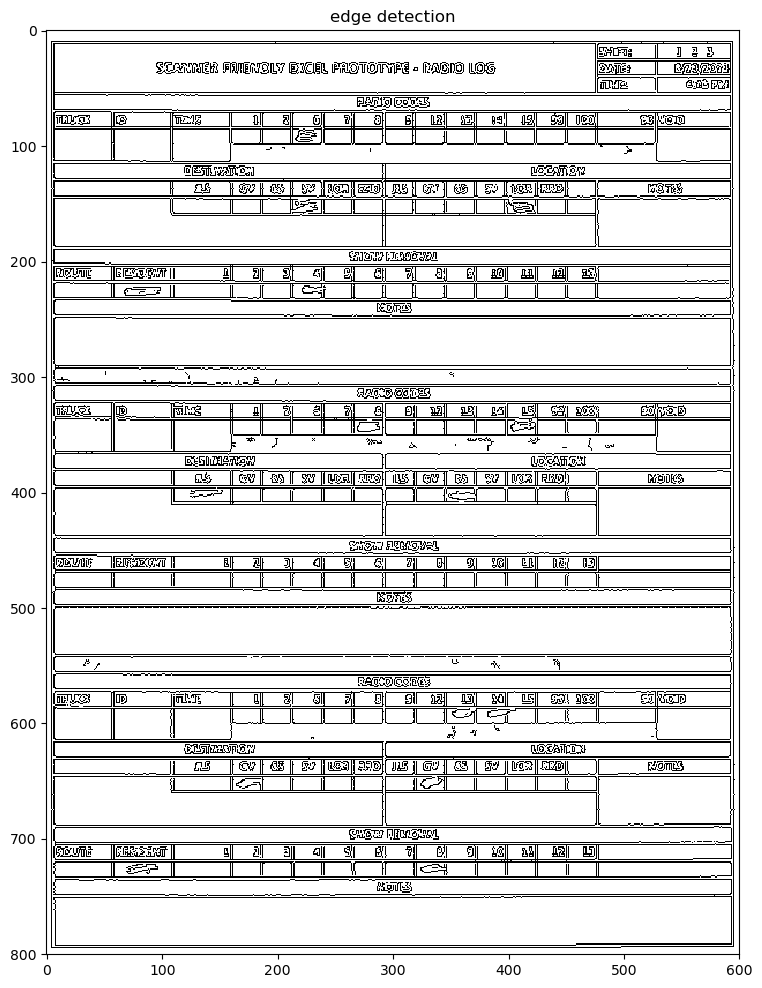

In [8]:
plt.imshow(edged)
plt.pcolor(edged, cmap = cm.binary)
plt.title('edge detection')
plt.show()

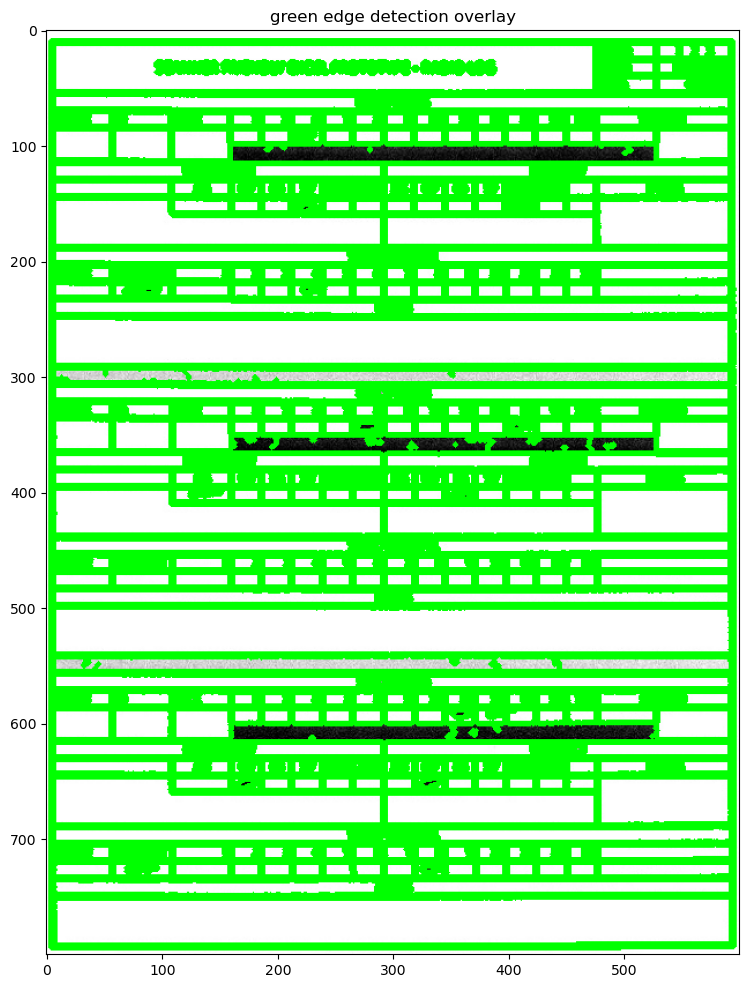

In [9]:
contours, _ = cv2.findContours(edged, cv2.RETR_LIST, cv2.CHAIN_APPROX_NONE)

green = (0, 255, 0)

cv2.drawContours(image1, contours, -1, green, 3)
plt.imshow(image1)
#plt.pcolor(edged, cmap = cm.binary)
plt.title('green edge detection overlay')
plt.show()

In [10]:
def get_rect_cnts(contours):
    rect_cnts = []
    for cnt in contours:
        # approximate the contour
        peri = cv2.arcLength(cnt, True)
        approx = cv2.approxPolyDP(cnt, 0.02 * peri, True)
        # if the approximated contour is a rectangle ...
        if len(approx) == 4:
            # append it to our list
            rect_cnts.append(approx)
    # sort the contours from biggest to smallest
    rect_cnts = sorted(rect_cnts, key=cv2.contourArea, reverse=True)
    
    return rect_cnts

In [11]:
rect_cnts = get_rect_cnts(contours)
# warp perspective to get the top-down view of the document
document = four_point_transform(image2, rect_cnts[0].reshape(4, 2))
document1 = document.copy()  # for display purposes
document2 = document.copy()  # for display purposes
document3 = document.copy()  # for display purposes
document4 = document.copy()  # for display purposes
document5 = document.copy()  # for display purposes

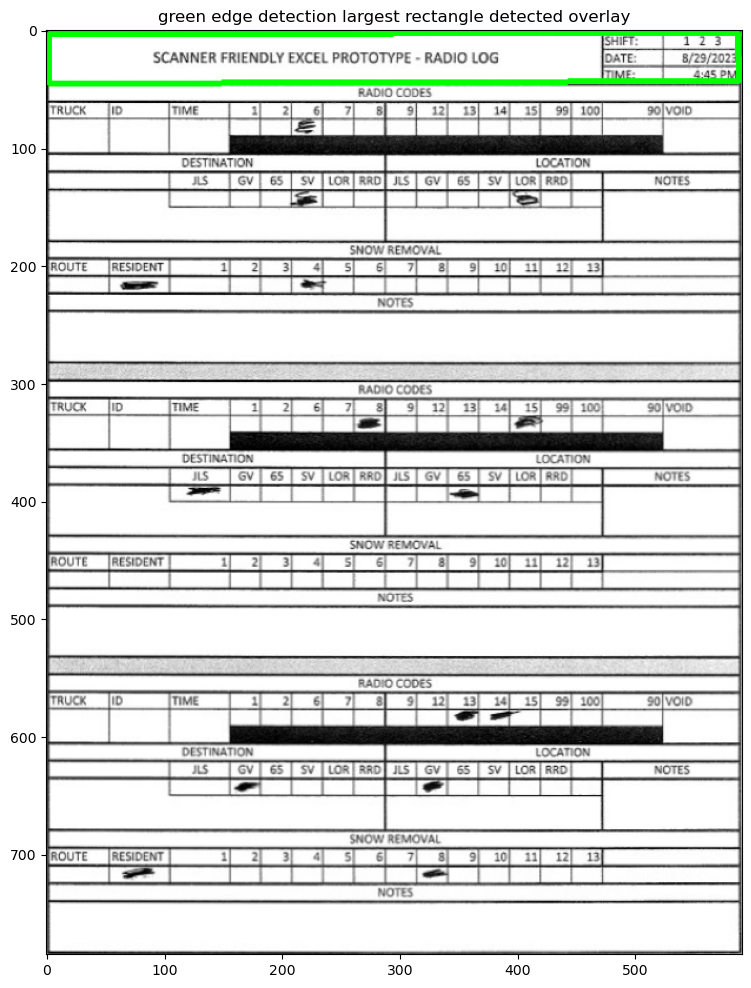

In [12]:
gray_doc = cv2.cvtColor(document, cv2.COLOR_BGR2GRAY)
blur_doc = cv2.GaussianBlur(gray_doc, (5, 5), 0)
edge_doc = cv2.Canny(blur_doc, 10, 70)
contours, _ = cv2.findContours(edge_doc, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)


rect_cnts = get_rect_cnts(contours)
# outline of the questions
biggest_cnt = rect_cnts[0]
# outline of the grade
grade_cnt = rect_cnts[1]

cv2.drawContours(document, rect_cnts[:1], -1, green, 3)
plt.imshow(document)
#plt.pcolor(edged, cmap = cm.binary)
plt.title('green edge detection largest rectangle detected overlay')
plt.show()

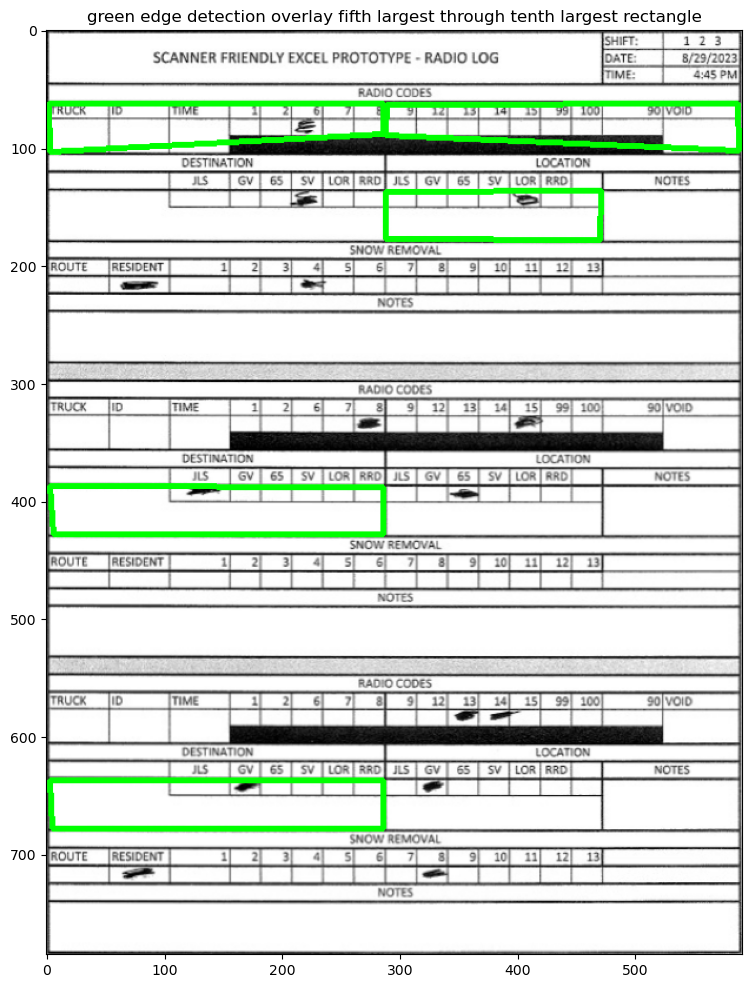

In [13]:
gray_doc = cv2.cvtColor(document1, cv2.COLOR_BGR2GRAY)
blur_doc = cv2.GaussianBlur(gray_doc, (5, 5), 0)
edge_doc = cv2.Canny(blur_doc, 10, 70)
contours, _ = cv2.findContours(edge_doc, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)


rect_cnts = get_rect_cnts(contours)
# outline of the questions
biggest_cnt = rect_cnts[0]
# outline of the grade
grade_cnt = rect_cnts[1]

cv2.drawContours(document1, rect_cnts[4:9], -1, green, 3)
plt.imshow(document1)
#plt.pcolor(edged, cmap = cm.binary)
plt.title('green edge detection overlay fifth largest through tenth largest rectangle')
plt.show()

# The most fun you can have without breaking the law!

Thanks for your consideration on this bold and visionary idea.